<a href="https://colab.research.google.com/github/george88888/Data-Mining-and-Machine-Learning/blob/master/Preprocessing_and_KnnClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy 
import matplotlib
import matplotlib.pyplot as plt

In [0]:
X = numpy.random.randn(10, 5)
print (X[1,:])
print (X[:, 1])

[-1.12294062 -0.80681231  0.31560445 -0.78557627 -0.22120653]
[ 0.03869315 -0.80681231 -0.2519436   0.76538903 -0.77842728  0.03151713
 -0.87469014  1.21958643  0.00160522 -0.65089622]


Next, lets $\ell_1$ normalize each feature vector. For this purpose we must compute the sum of the absolute values in each feature vector and divide each element in the vector by the norm. $\ell_1$ norm is defined as follows:

$\ell_1 (\mathbf{x}) = \sum_i |x_i|$

In [0]:
for i in range(0, 10):
    print(i, numpy.sum(numpy.abs(X[i,:])))

0 3.2824188176477787
1 3.252140177582553
2 3.560915337841582
3 4.862090959989583
4 5.146237148136559
5 3.802954397693445
6 1.985144187627578
7 2.8028333252051434
8 3.4798872965928997
9 4.186833213615184


Now lets compute $\ell_2$ norms instead. We need to compute the squares, add them and take the square root for this.

In [0]:
for i in range(0, 10):
    print (i, numpy.sqrt(numpy.sum(X[i,:] * X[i,:])))

0 1.8528285194395113
1 1.636340522170592
2 1.8374226321634468
3 2.559671686352667
4 2.4797014822793795
5 2.2694374988295802
6 1.0627060065452505
7 1.6401301448474421
8 2.765051110749676
9 2.005030185450553


If you wanted to $\ell_2$ normalize X then this can be done as follows. 

In [0]:
def row_normalize(X):
  for i in range(0,10):
      norm = numpy.sqrt(numpy.sum(X[i,:] * X[i,:]))
      X[i,:] = X[i,:] / norm
  return X

norm_X = normalize(X)
print(norm_X)

[[ 6.53994472e-01  2.08832885e-02  6.22333734e-01  4.26978716e-01
  -4.73816229e-02]
 [-6.86251181e-01 -4.93058933e-01  1.92872112e-01 -4.80081167e-01
  -1.35183678e-01]
 [ 1.05015072e-01 -1.37117939e-01  4.78411260e-01  6.18734926e-01
   5.98715511e-01]
 [-7.27246499e-01  2.99018439e-01 -4.56703168e-01 -4.16079941e-01
   4.49841023e-04]
 [ 6.75195013e-01 -3.13919754e-01  5.48650051e-01  2.73925735e-01
  -2.63654881e-01]
 [ 2.93119659e-01  1.38876409e-02  2.80306937e-01 -8.92771595e-01
   1.95639716e-01]
 [-4.51529519e-01 -8.23078191e-01  1.72479341e-01 -1.97680099e-01
  -2.23241665e-01]
 [ 6.09333114e-01  7.43591251e-01 -2.14194931e-02 -6.88969915e-02
   2.65668248e-01]
 [-9.77914004e-01  5.80538926e-04 -2.01398455e-01 -3.53797258e-02
  -4.32527643e-02]
 [ 3.07649705e-01 -3.24631631e-01  6.85616230e-01  5.14053367e-01
  -2.56213745e-01]]


In [0]:
for i in range(0,10):
  row_norm = (numpy.sqrt(numpy.sum(X[i,:] * X[i,:])))
  assert row_norm >= (1. - 1e-8) or row_norm <= (1. + 1e-8) 

Let us assume that we further wish to scale each feature (dimension) to [0,1] range using (x - min) / (max - min) method (see the lecture notes for details). We need to find the min and max for each feature across all feature vectors. This turns out to be computing the min and max for each column in X. Guess what, numpy has min and max functions that return the min and max values of an array. How convenient... 

In [0]:
for j in range(0, 5):
    minVal = numpy.min(X[:,j])
    maxVal = numpy.max(X[:,j])
    for i in range(0, 10):
        X[i,j] = (X[i,j] - minVal) / (maxVal - minVal)
        
print (X)

[[0.98717535 0.53869786 0.94460175 0.8731357  0.25078929]
 [0.1764329  0.21065022 0.56864593 0.27303252 0.14897451]
 [0.6550863  0.43784619 0.8186103  1.         1.        ]
 [0.15163398 0.71623062 0.         0.31537519 0.30625439]
 [1.         0.32499417 0.88009818 0.77187714 0.        ]
 [0.76887468 0.53423256 0.64518742 0.         0.53259551]
 [0.31842091 0.         0.55079386 0.45986669 0.04686294]
 [0.96015877 1.         0.38105251 0.54506851 0.61380021]
 [0.         0.52573868 0.22349679 0.56724325 0.25557709]
 [0.77766421 0.31815682 1.         0.93074356 0.0086287 ]]


OK! Everything is in [0,1] now. One thing to remember is that **if min and max are the same then the division during the scaling will be illegal**. If this is the case then **it means all values of that feature are the same**. So you can **either set it to 0 or 1**, as you wish as long as it is consistent. Of course, if a feature has the same value across all train instances then it is not a useful feature because it does not discriminate the different classes. So you can even remove that feature from your train data and be happy about it (one less feature to worry about).



Let us assume that we wanted to do Gaussain scaling (see lecture notes) on this X. Here, we would use (x - mean) / sd, where sd is the standard deviation of the feature values. Not very surprisingly numpy has numpy.mean and numpy.std functions that do exactly this. I guess at this point I can convince you why you should use python+numpy for data mining and machine learning.



In [0]:
for j in range(0, 5):
    mean = numpy.mean(X[:,j])
    sd = numpy.std(X[:,j])
    for i in range(0, 10):
        X[i,j] = (X[i,j] - mean) / sd

# K-Nearest Neighbor Classification

With the data normalization primer, we now move onto using these preprocessing steps to pass inputs to a classifier that can discriminate between two classes

This example shows how to use k-NN classifier to classify a dataset. We will first generate a binary classification dataset consisitng of 2D feature vectors, randomly sampled from two Gaussian distributions. We will then learn a k-NN classifier to separate the two classes.


In [0]:
N = 5
pos = numpy.random.multivariate_normal([0,0], [[1,0],[0,1]], 2 * N)
neg = numpy.random.multivariate_normal([2,2], [[1,0],[0,1]], 2 * N)

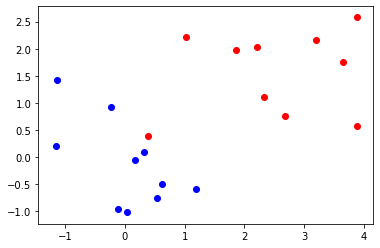

In [0]:
plt.scatter(neg[:,0], neg[:,1], c='r')
plt.scatter(pos[:,0], pos[:,1], c='b')

We now split the positive and negative samples into N training samples and N test samples (i.e 50-50 split)

In [0]:
train_pos = pos[:N,:]
test_pos = pos[N:,:]
train_neg = neg[:N,:]
test_neg = neg[:N,:]

Lets assign pos (+1) and neg (-1) labels to our train and test instances.


In [0]:
train_data = [(1, x) for x in train_pos]
train_data.extend([(-1, x) for x in train_neg])

test_data = [(1, x) for x in test_pos]
test_data.extend([(-1, x) for x in test_neg])

In [0]:
print (train_data)
print (test_data)

Below we implement a k-NN function that uses the cosine similarity function compute the similarity scores between k-neighbouring samples.




In [0]:
def sim(p, q):
    score = numpy.dot(p,q) / (numpy.linalg.norm(p) * numpy.linalg.norm(q))
    return score

def predict(x, k):
    L = [(y, sim(x, z)) for (y,z) in train_data]
    L.sort(key=lambda tup: tup[1], reverse = True)  # sorts in place    
    #print L[:k]
    score = sum([e[0] for e in L[:k]])
    if score > 0:
        return 1
    else:
        return -1

Take a moment to study the predict function. k-NN happens here. We are given k and the instance to be classified, x. The first thing we do is computing the similarity scores between x and each instance z in our train dataset. We must also store the labels so that we can later find the majority label.

Next, we need to find the neighbours. For that we sort this list of tuples by the value of the second item in tuples, which is similarity. lambda expressions are convenient ways to write in-place functions. Here, we take two elements from our list, compare their similarity scores and return -1 or +1. The sort function will then use this to sort the list. In this case, it will sort in the descending order of similarity scores.

If you would like to confirm that it is indeed the descending order you can print the list after sorting (uncomment that line).

Next, we must find the majority label. Since we are doing binary classification and our labels are -1 and +1, when we add the labels for the nearest neigbours if we get a positive value then there must be more +1s than -1s, vice versa. You might have to do more complicated stuff for finding the majority label if there were more than 2 classes. But it is easy for the binary case as shown here

Lets compute the accuracy of our k-NN classifier.


In [0]:
corrects = 0
k = 5
for (y,x) in test_data:
    if y == predict(x, k):
        corrects += 1
accuracy = float(corrects) / float(len(test_data))
print ("Accuracy =", accuracy)

Accuracy = 0.6


So we have a decent? classifier here. Try the following things:
* change the value of k
* increase the number of instances N
* separate or bring together the two classes by adjusting the means of the two Gaussians.

How does the accuracy vary in each case?